<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import numpy as np
import sys
sys.path.append('src')  # Agrega la carpeta 'src' al PATH

from src import support as sp  # Importa la función desde el archivo

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor


In [2]:
df=pd.read_csv("data/autorenew.csv")

In [3]:
df.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
107747,2016-03-30 11:53:17,Audi_A3_2.0_TDI_Sportback__clean_diesel__S_lin...,private,offer,29700,test,combi,2015,manually,148.0,a3,10000,5,diesel,audi,no,2016-03-30 00:00:00,0,74912,2016-04-07 02:45:06
109913,2016-04-04 12:53:54,BMW_E36_325I,private,offer,600,control,coupe,1992,manually,189.0,NaN,150000,3,NaN,bmw,no,2016-04-04 00:00:00,0,88131,2016-04-04 13:40:22
331525,2016-03-12 18:55:27,BMW_530d_Vollausstattung_Weiss_foliert,private,offer,12500,test,combi,2009,automatic,232.0,5er,150000,1,NaN,bmw,NaN,2016-03-12 00:00:00,0,58095,2016-03-16 00:47:07
363783,2016-03-14 05:41:14,auto_verkaufe,private,offer,3000,test,small car,2005,manually,0.0,rio,20000,2,petrol,kia,no,2016-03-13 00:00:00,0,85356,2016-04-06 21:18:56
16924,2016-03-26 10:42:52,Renault_Trafic_ex_Wohnmobil_zum_schlachten,private,offer,0,test,other,2016,NaN,0.0,andere,5000,0,diesel,renault,yes,2016-03-26 00:00:00,0,7422,2016-04-05 21:17:31


In [4]:
df.shape

(371528, 20)

In [5]:
df.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 7
yearOfRegistration        155
gearbox                     2
powerCV                   788
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

In [6]:
df.isnull().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
nrOfPictures                0
postalCode                  0
lastSeen                    0
dtype: int64

In [7]:
sp.exploracion_basica_dataframe(df)

El número de datos es 371528 y el de columnas es 20

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 4

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.003478
gearbox,5.439429
model,5.513447
fuelType,8.986133
notRepairedDamage,19.395577



 ------------------------------- 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 
Index(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType',
       'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen'],
      dtype='object')
La columna DATECRAWLED tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-26 22:57:31,6
2016-03-19 21:49:56,6
2016-03-22 10:42:10,5
2016-04-04 22:38:11,5
...,...
2016-03-21 12:57:01,1
2016-03-15 22:49:09,1
2016-03-17 10:53:50,1



 ------------------------------- 

La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523
...,...
Subaru_Justy_1.3,1
OPEL_CORSA_B__ECO_SWING__TÜV_1/17_8fach_Bereifung/Schiebedach/CD,1
Ford_C___Max_Titanium_1_0_L_EcoBoost,1



 ------------------------------- 

La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3



 ------------------------------- 

La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12



 ------------------------------- 

La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943



 ------------------------------- 

La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015
suv,14707
other,3357


La columna VEHICLETYPE tiene 133763 valores nulos

 ------------------------------- 

La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna GEARBOX tiene 20209 valores nulos

 ------------------------------- 

La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573
...,...
serie_2,8
rangerover,6
serie_3,4


La columna MODEL tiene 20484 valores nulos

 ------------------------------- 

La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278
other,208
electro,104


La columna FUELTYPE tiene 33386 valores nulos

 ------------------------------- 

La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873
ford,25573
renault,17969
peugeot,11027
fiat,9676



 ------------------------------- 

La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna NOTREPAIREDDAMAGE tiene 72060 valores nulos

 ------------------------------- 

La columna DATECREATED tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305
...,...
2015-12-17 00:00:00,1
2015-11-10 00:00:00,1
2016-01-06 00:00:00,1



 ------------------------------- 

La columna LASTSEEN tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-06 13:45:54,17
2016-04-07 06:45:59,17
2016-04-07 08:16:54,16
2016-04-06 09:46:00,16
2016-04-06 04:17:20,16
...,...
2016-03-26 09:44:53,1
2016-03-16 09:16:46,1
2016-04-05 05:45:56,1



 ------------------------------- 

Los valores que tenemos para las columnas numericas son: 
La columna PRICE tiene las siguientes valore únicos:


,count
price,
0,10778
500,5670
1500,5394
1000,4649
1200,4594
...,...
11333,1
1898,1
378,1


La columna YEAROFREGISTRATION tiene las siguientes valore únicos:


,count
yearOfRegistration,
2000,24551
1999,22767
2005,22316
2006,20230
2001,20218
...,...
1602,1
9229,1
7100,1


La columna POWERCV tiene las siguientes valore únicos:


,count
powerCV,
0.0,40820
74.0,24035
59.0,15907
148.0,15442
138.0,13585
...,...
1666.0,1
984.0,1
1085.0,1


La columna KILOMETER tiene las siguientes valore únicos:


,count
kilometer,
150000,240797
125000,38067
100000,15920
90000,12523
80000,11053
70000,9773
60000,8669
50000,7615
5000,7069


La columna MONTHOFREGISTRATION tiene las siguientes valore únicos:


,count
monthOfRegistration,
0,37675
3,36170
6,33167
4,30918
5,30631
7,28958
10,27337
11,25489
12,25380


La columna NROFPICTURES tiene las siguientes valore únicos:


,count
nrOfPictures,
0,371528


La columna POSTALCODE tiene las siguientes valore únicos:


,count
postalCode,
10115,828
65428,637
66333,349
38518,326
44145,323
...,...
94167,1
25599,1
79697,1


A la vista de los datos procedemos a convertir los datos atipicos en nulos para posteriormente procesarlos

In [ ]:
# Limpieza de duplicados
df=df.drop_duplicates()

In [8]:
# Ver valores atipicos de "price"
limite_inferior = 100
limite_superior = 100000
valores_fuera_rango = df[(df['price'] < limite_inferior) | (df['price'] > limite_superior)]
df.loc[df['price'] < limite_inferior, 'price'] = np.nan
df.loc[df['price'] > limite_superior, 'price'] = np.nan
valores_fuera_rango.shape

(13723, 20)

In [ ]:
# Ver valores atipicos de "yearOfRegistration"
limite_inferior = 1885
limite_superior = 2024
valores_fuera_rango = df[(df['yearOfRegistration'] < limite_inferior) | (df['yearOfRegistration'] > limite_superior)]
df.loc[df['yearOfRegistration'] < limite_inferior, 'yearOfRegistration'] = np.nan
df.loc[df['yearOfRegistration'] > limite_superior, 'yearOfRegistration'] = np.nan
valores_fuera_rango.shape


In [10]:
# Ver valores atipicos de "powerCV"
limite_inferior = 20
limite_superior = 500
valores_fuera_rango = df[(df['powerCV'] < limite_inferior) | (df['powerCV'] > limite_superior)]
df.loc[df['powerCV'] < limite_inferior, 'powerCV'] = np.nan
df.loc[df['powerCV'] > limite_superior, 'powerCV'] = np.nan
valores_fuera_rango.shape

(42014, 20)

In [11]:
# Ver valores atipicos de "monthOfRegistration"
df['monthOfRegistration'] = df['monthOfRegistration'].replace(0, np.nan)

In [12]:
# Elimino 5 columnas que considero que no aportan valor diferencial en a los datos
df2=df.drop(columns=["postalCode","lastSeen","dateCreated","dateCrawled","name","nrOfPictures","monthOfRegistration"])
df2.sample(5)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,fuelType,brand,notRepairedDamage
99514,private,offer,6999.0,test,NaN,2008.0,manually,197.0,passat,150000,NaN,volkswagen,NaN
82996,private,offer,650.0,test,NaN,2017.0,manually,74.0,golf,150000,petrol,volkswagen,NaN
238606,private,offer,8250.0,control,bus,2010.0,manually,129.0,scenic,125000,petrol,renault,no
290495,private,offer,950.0,test,NaN,2001.0,manually,64.0,2_reihe,150000,petrol,peugeot,no
313585,private,offer,NaN,test,suv,1994.0,automatic,163.0,andere,150000,petrol,ford,NaN


c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_cat, ax=axes[indice],palette=paleta,order=df_cat[columna].value_counts().index)
c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df_cat, ax=axes[indice],palette=paleta,order=df_cat[columna].value_counts().index)
c:\Users\alexc\Desktop\GIT\7.1.EDA_y_Gestion_de_Nulos\src\support.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

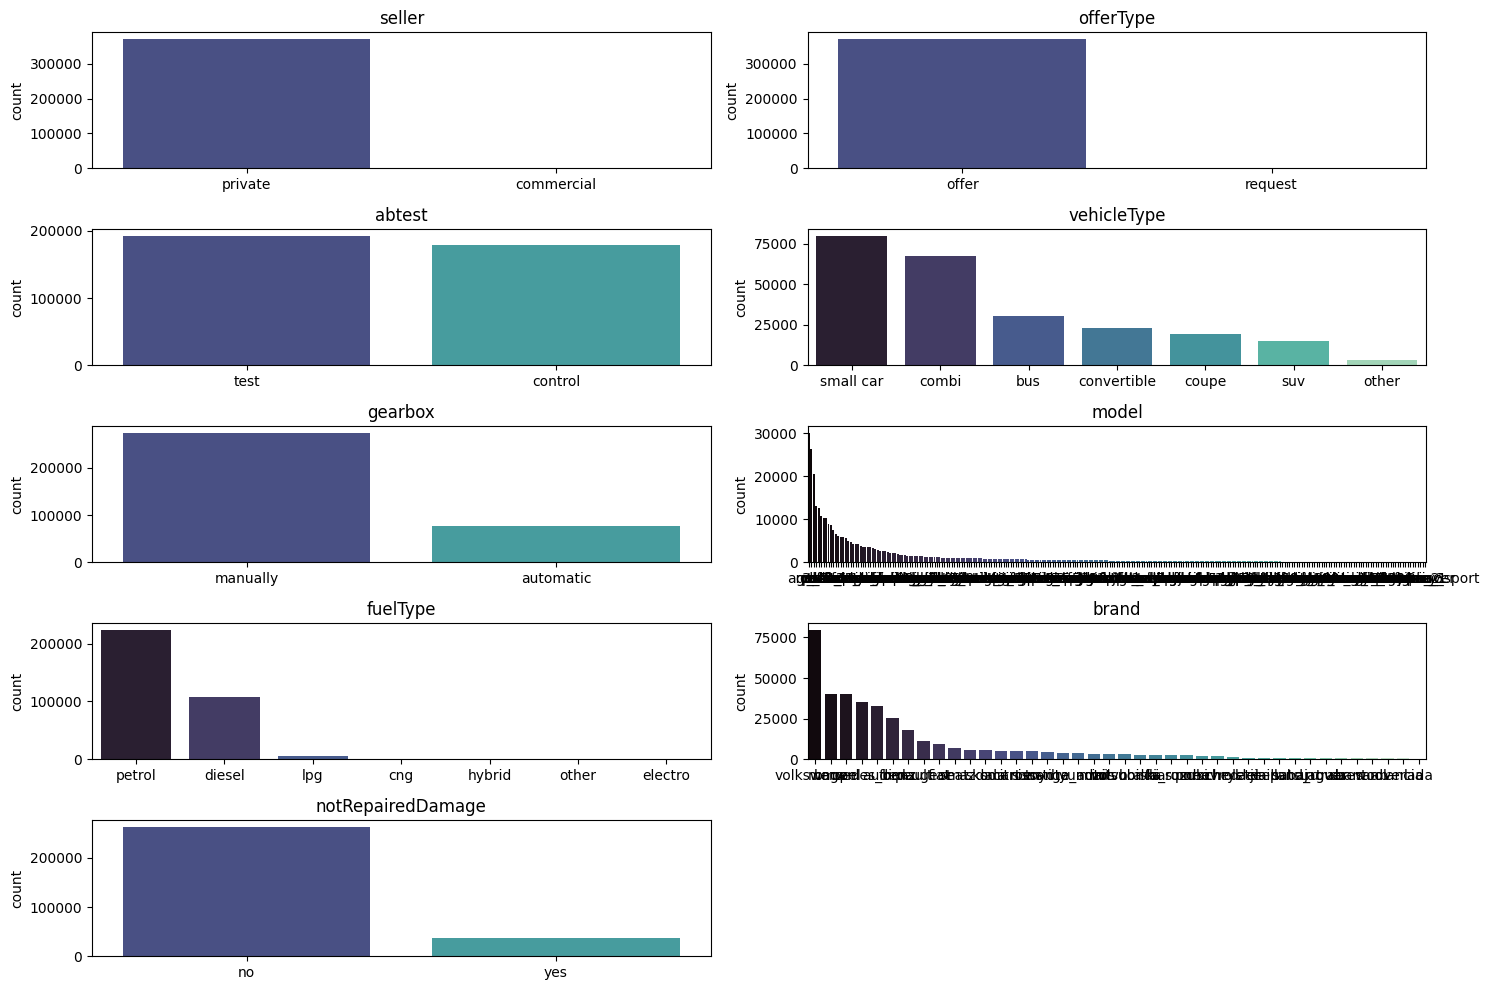

In [13]:
sp.plot_categoricas(df2)

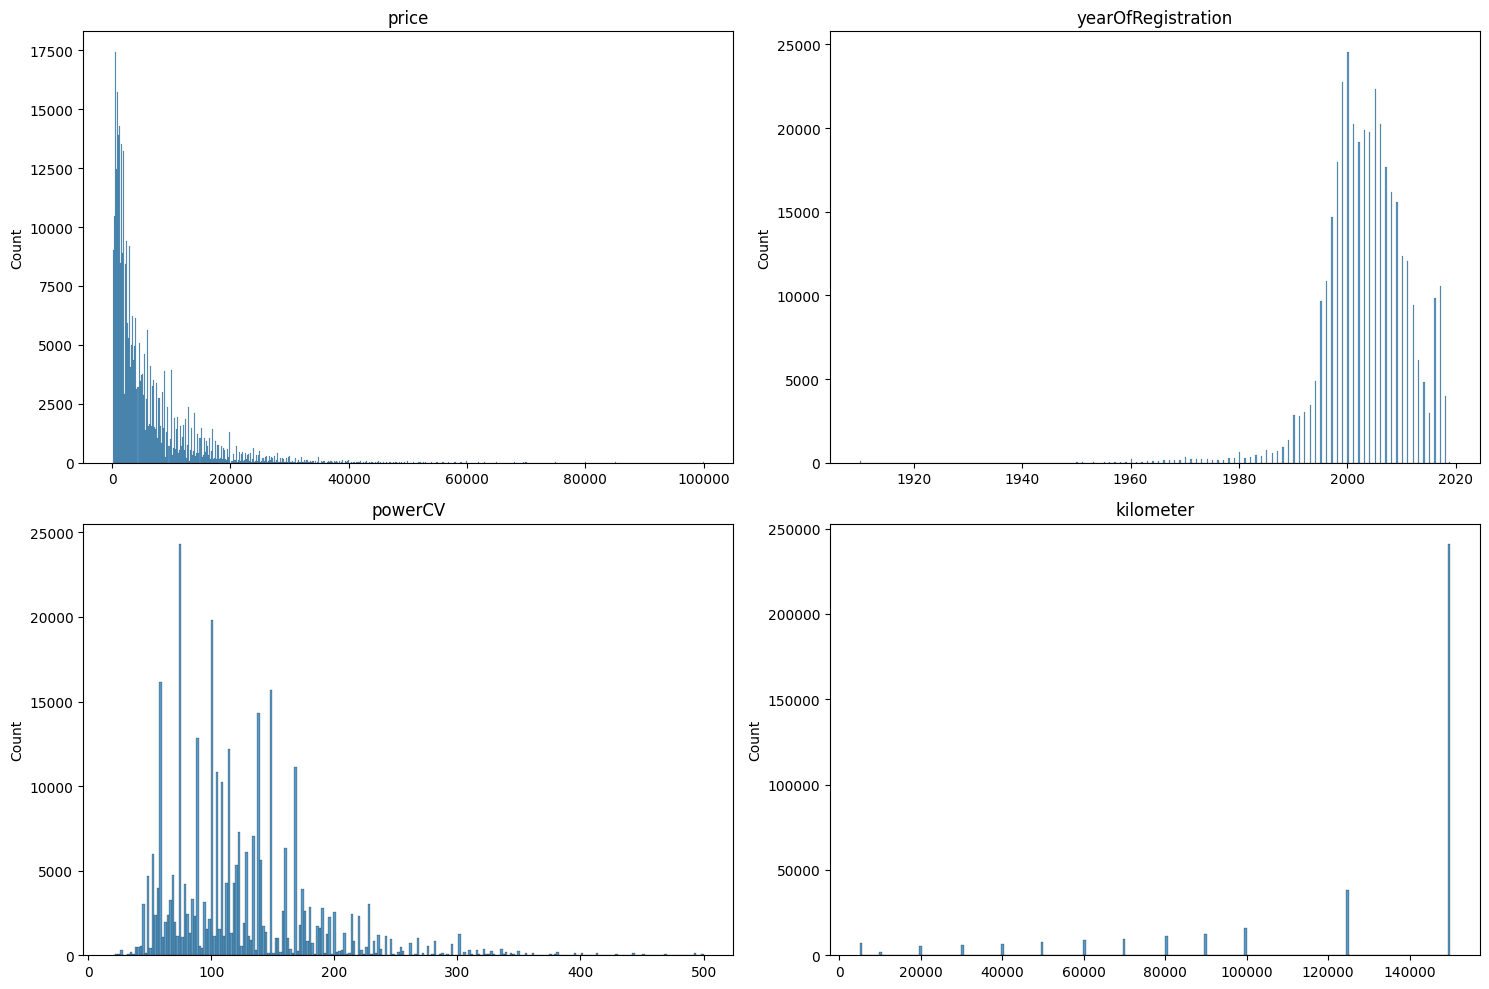

In [14]:
sp.plot_numericas(df2)

In [15]:
df.isnull().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                   13723
abtest                      0
vehicleType            133763
yearOfRegistration        182
gearbox                 20209
powerCV                 42014
model                   20484
kilometer                   0
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
nrOfPictures                0
postalCode                  0
lastSeen                    0
dtype: int64

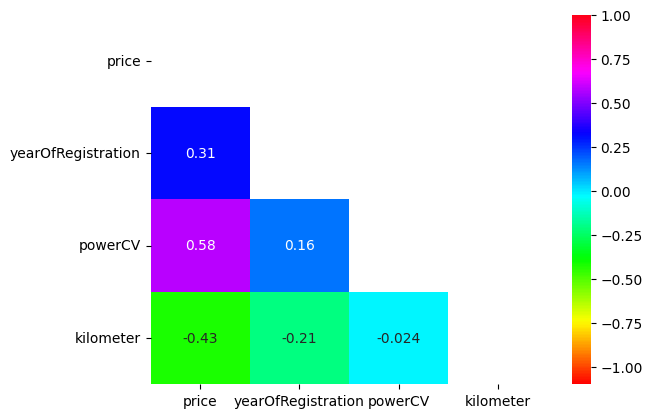

<Figure size 1000x1500 with 0 Axes>

In [16]:
sp.matriz_correlacion(df2)

In [17]:
df2.isnull().sum()

seller                     0
offerType                  0
price                  13723
abtest                     0
vehicleType           133763
yearOfRegistration       182
gearbox                20209
powerCV                42014
model                  20484
kilometer                  0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [20]:
df_cat=df2.select_dtypes(include="O")
imputer = SimpleImputer(strategy="most_frequent")
df_cat_sin_nulos = pd.DataFrame(imputer.fit_transform(df_cat), columns=df_cat.columns)
df_simf = df2.copy()
df_simf[df_cat.columns] = df_cat_sin_nulos
df_simf.isnull().sum()

seller                    0
offerType                 0
price                 13723
abtest                    0
vehicleType               0
yearOfRegistration      182
gearbox                   0
powerCV               42014
model                     0
kilometer                 0
fuelType                  0
brand                     0
notRepairedDamage         0
dtype: int64

In [22]:
print(df2.isnull().sum())
df_num = df2.select_dtypes(include=np.number)
iter_imputer = IterativeImputer(random_state=0)
df_num_imputado = pd.DataFrame(iter_imputer.fit_transform(df_num), columns=df_num.columns)
df_imputado = df2.copy()
df_imputado[df_num.columns] = df_num_imputado
print(df_imputado.isnull().sum())

seller                     0
offerType                  0
price                  13723
abtest                     0
vehicleType           133763
yearOfRegistration       182
gearbox                20209
powerCV                42014
model                  20484
kilometer                  0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType           133763
yearOfRegistration         0
gearbox                20209
powerCV                    0
model                  20484
kilometer                  0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64


In [24]:
df_num=df2.select_dtypes(include=np.number)
imputer_knn=KNNImputer(n_neighbors=2)
knn_imputado=imputer_knn.fit_transform(df_num)
df_num_sin_nulos=pd.DataFrame(knn_imputado, columns=df_num.columns)
df_knn=df2.copy()
df_knn[df_num.columns]=df_num_sin_nulos
df_knn.isnull().sum()

seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType           133763
yearOfRegistration         0
gearbox                20209
powerCV                    0
model                  20484
kilometer                  0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [29]:
# Suponiendo que df2 es tu dataframe original
df_rfr = df2.copy()  # Hacer una copia del dataframe

# Seleccionar solo columnas numéricas
num_cols = df_rfr.select_dtypes(include="number").columns

# Iterar sobre cada columna numérica para realizar la imputación
for col in num_cols:
    # Verificar si hay valores nulos en la columna
    if df_rfr[col].isnull().sum() > 0:
        # Dividir los datos en dos partes: disponible y faltante
        df_train = df_rfr[df_rfr[col].notna()]
        df_missing = df_rfr[df_rfr[col].isna()]
        
        # Si hay suficientes datos para entrenar
        if not df_missing.empty and len(df_train) > 10:
            # Crear un modelo de RandomForest
            model = RandomForestRegressor(n_estimators=100, random_state=0)
            
            # Usar solo columnas numéricas como predictores, excluyendo la columna objetivo
            predictors = df_train.select_dtypes(include="number").drop(columns=[col])
            
            # Entrenar el modelo usando las demás columnas numéricas como predictores
            model.fit(predictors, df_train[col])
            
            # Seleccionar predictores para las filas con valores faltantes en la columna actual
            missing_predictors = df_missing.select_dtypes(include="number").drop(columns=[col])
            
            # Predecir los valores faltantes
            pred_values = model.predict(missing_predictors)
            
            # Rellenar los valores faltantes con las predicciones
            df_rfr.loc[df_rfr[col].isna(), col] = pred_values


In [26]:
df.to_csv("result/df.csv")